# Assignment 2: Day Trading in the Stock Market, Multiplicative Weights Algorithm (MWA)
### Angelidis Nikolaos 2019030190
___

## Importing necessary libraries for data manipulation, maths and plotting the results
- pandas : dataframe
- numpy : maths, arrays
- matplotlib : plotting


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the csv file into a dataframe object, without column names and displaying it

In [54]:
df = pd.read_csv("/content/drive/MyDrive/stocks (1).csv", header=None)

In [55]:
# 10 different stocks monitored for 2000 days
df

,0,1,2,3,4,5,6,7,8,9
0,-0.020195,-0.005485,-0.019498,0.024145,-0.013656,0.031478,0.026964,0.015120,-0.037719,0.028160
1,0.013504,0.020774,-0.014953,0.042760,0.000546,-0.002150,-0.044521,0.008070,0.011728,0.028515
2,0.013324,0.018568,-0.010172,0.049762,0.003340,0.003406,0.021505,0.002853,-0.027456,0.029710
3,-0.008766,-0.014985,-0.021028,0.002851,-0.001291,-0.001524,0.025731,-0.002378,0.000314,-0.020410
4,-0.001164,0.020023,-0.001938,-0.001474,-0.003027,-0.008048,-0.028506,-0.010002,-0.005644,-0.010044
...,...,...,...,...,...,...,...,...,...,...
1994,0.002295,-0.026606,-0.019807,0.002365,-0.011904,-0.002814,-0.005084,0.018813,0.021484,-0.014436
1995,-0.004579,0.001477,0.032896,0.006460,-0.002616,-0.011049,-0.012653,0.020951,0.011950,0.027042
1996,0.009283,-0.039587,-0.009676,0.015069,-0.013270,0.008319,-0.008590,-0.003340,-0.008975,-0.028250
1997,-0.008465,-0.041859,-0.004481,0.025456,-0.032824,0.007170,0.011931,0.028737,-0.004290,-0.036692


### Initializing global variables, such as the amount of stocks, horizon and discount factor

In [74]:
K = len(df.columns)             # K is the amount of stocks
T = df.shape[0]                 # Horizon is the number of days
n = np.sqrt(np.log(K)/T)        # n is part of the discount factor of the weights, controlling how big of a discount we will have per day
# n = 0.5

## Task 1: Experts Setup
___


### Multiplicative Weights Algorithm (MWA)
### For each day:
1. we pick a random stock depending on the probability p_i of each stock
2. get the percentages for increase/decrease of each stock
3. calculate the profit for our chosen stock
4. calculate the losses for each stock
5. calculate the weights for the next day
6. update the sum of percentages for all stocks ( way to get the best expert up to a certain point )
7. get the best expert by getting the index of the stock with the largest percentage sum
8. calculate the regret of the algorithm

### Where:
- $p_i(t) = w_i(t) / W(t)$
- $w_i(t)$ : weight of the stock i at time t  
- $W(t)$ : sum of the weights of all the stocks at time t
- loss : if percentage for current stock is positive then loss is 0, if negative loss is -percentage (since the percentage is negative)
- $w_i(t+1) : (1-n)^{loss_i} \cdot w_i(t)$
- regret = Lalg - Lopt
- Lalg : loss of the algorithm
- Lopt : loss of the best expert

In [78]:
weights = np.ones(K)                # Initialize all weights to start from 1
percentages_sums = np.zeros(K)      # Array that holds the sum of the percentages for each stock
regret = np.zeros(T)                # Array that holds the regret for each t
profit = np.zeros(T)                # Array that holds the amount made during the horizon

for t in range(T):
    # print(f"Weights for time {t} : {list(weights)}")

    # get current stock with probabilities based on weights
    total_weights = sum(weights)                                                    # sum of all the current weights
    choose_probabilities = np.array([ weights[i]/total_weights for i in range(K) ]) # probability to choose each agent based on weights
    chosen_stock = np.random.choice(list(df), p=choose_probabilities)               # get current stock
    #print(f"Chosen stock : {chosen_stock}")

    # all stocks
    all_stock_percentages = df.iloc[t]                                              # get all stock percentages for current t
    #print(f"Stock Percentages time {t}:\n{list(all_stock_percentages)}")

    # profit update
    profit[t] = all_stock_percentages[chosen_stock] if t == 0 else profit[t-1]+all_stock_percentages[chosen_stock]

    # calculate losses
    # if the percentage: positive -> loss = 0 | negative: loss = -percentage
    all_losses = [0 if current_percentage > 0 else -current_percentage for current_percentage in all_stock_percentages]
    # print(f"Losses time {t}:\n{all_losses}")

    # calculate new weights
    # for each stock's current_weight and current loss, calculate the next weights
    # w(t+1) = (1-n)^loss * w(t)
    weights = np.array([np.power((1-n),loss)*weight for weight, loss in zip(weights,all_losses)])

    # update the percentage sums of each stock \
    for i in range(len(percentages_sums)):
        percentages_sums[i] += all_stock_percentages[i]
    # print(f"Sum Stock Percentages time {t}:\n{list(percentages_sums)}")

    # get the index of the best expert
    best_expert_index = np.where(all_stock_percentages==np.max(all_stock_percentages))[0][0]
    # print(f"At time {t} : best expert is : {best_expert_index}")

    # calculate regret, regret is : Lalg - Lopt, where Lalg ->LossOfAlgorithm and Loss of the Best Expert
    current_regret = (all_losses[chosen_stock] - all_losses[best_expert_index])/(t+1)
    regret[t] = current_regret if t == 0 else regret[t-1]+current_regret

    # print(f"Regret at time {t} : {current_regret}")
    # print(f"Total Regret at time {t} : {regret[t]}")
   # print()

### Plotting results
#### Plot 1 : Cumulative regret of the MWA algorithm, from day 1 to the last day.

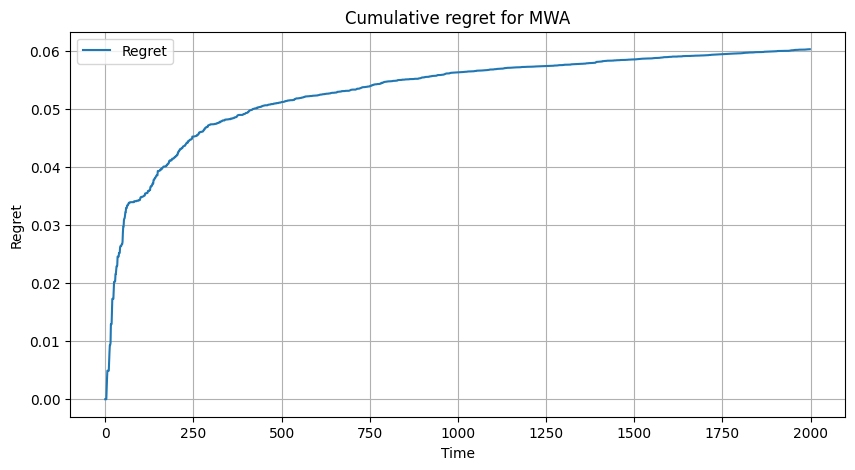

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(regret, label='Regret')
plt.xlabel('Time')
plt.ylabel('Regret')
plt.title("Cumulative regret for MWA")
plt.legend()
plt.grid()
plt.show()

As we can see from the above plot the regret of our MWA algorithm is growing sublinearly.

#### Plot 2 : Cumulative profits of the MWA algorithm

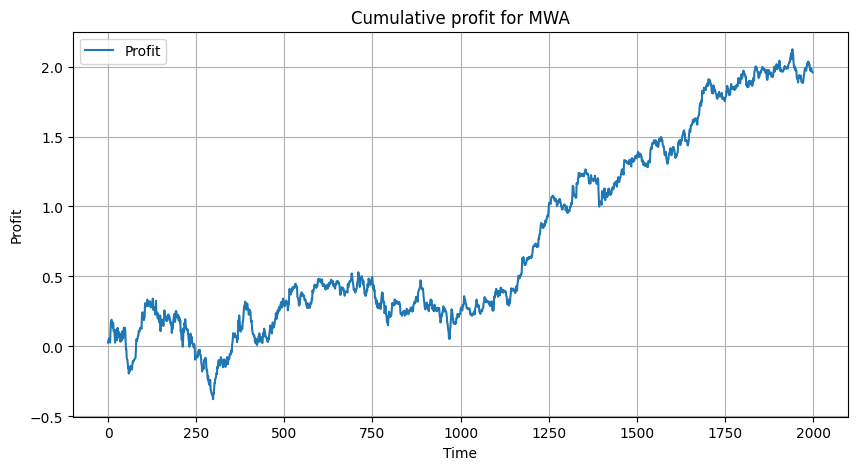

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(profit, label='Profit')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.title("Cumulative profit for MWA")
plt.legend()
plt.grid()
plt.show()

In the above plot, the profit of the MWA is displayed and is shown to be growing during the horizon.

## Task 2: Experts with Transactions Fees
___

### Initialize the transaction fees for every stock.
#### Transaction fess are 0.5%, 1%, 1.5% ... for stocks 0 to K, respectively.

In [65]:
transactions_fees = [x*0.005+0.005 for x in range(K)]

In [66]:
transactions_fees

[0.005,
 0.01,
 0.015,
 0.02,
 0.025,
 0.030000000000000002,
 0.034999999999999996,
 0.04,
 0.045,
 0.049999999999999996]

#### The only change from the implementation of the algorithm of task 1 is the addition of the transaction fees. We do that by subtracting the fee of the current stock from the stock percentage at time t and do the same actions as before.  

In [67]:
weights = np.ones(K)                # Initialize all weights to start from 1
percentages_sums = np.zeros(K)      # Array that holds the sum of the percentages for each stock
regret_2 = np.zeros(T)              # Array that holds the regret for each t
profit_2 = np.zeros(T)              # Array that holds the amount made during the horizon

for t in range(T):
    # print(f"Weights for time {t} : {list(weights)}")

    # get current stock with probabilities based on weights
    total_weights = sum(weights)                                                    # sum of all the current weights
    choose_probabilities = np.array([ weights[i]/total_weights for i in range(K) ]) # probability to choose each agent based on weights
    chosen_stock = np.random.choice(list(df), p=choose_probabilities)               # get current stock
    #print(f"Chosen stock : {chosen_stock}")

    # all stocks minus the transaction fee
    all_stock_percentages = [stock_percentage-transactions_fees[i] for i, stock_percentage in enumerate(list(df.iloc[t]))]
    # print(f"Stock Percentages time {t}:\n{list(all_stock_percentages)}")

    # profit update
    profit_2[t] = all_stock_percentages[chosen_stock] if t == 0 else profit_2[t-1]+all_stock_percentages[chosen_stock]
    # print(f"Profit: {all_stock_percentages[chosen_stock]}")

    # calculate losses
    # if the percentage: positive -> loss = 0 | negative: loss = -percentage
    all_losses = [0 if current_percentage > 0 else -current_percentage for current_percentage in all_stock_percentages]
    # print(f"Losses time {t}:\n{all_losses}")

    # calculate new weights
    # for each stock's current_weight and current loss, calculate the next weights
    # w(t+1) = (1-n)^loss * w(t)
    weights = np.array([np.power((1-n),loss)*weight for weight, loss in zip(weights,all_losses)])

    # update the percentage sums of each stock \
    for i in range(len(percentages_sums)):
        percentages_sums[i] += all_stock_percentages[i]
    # print(f"Sum Stock Percentages time {t}:\n{list(percentages_sums)}")

    # get the index of the best expert
    best_expert_index = np.where(all_stock_percentages==np.max(all_stock_percentages))[0][0]
    # print(f"At time {t} : best expert is : {best_expert_index}")

    # calculate regret, regret is : Lalg - Lopt, where Lalg ->LossOfAlgorithm and Loss of the Best Expert
    current_regret = (all_losses[chosen_stock] - all_losses[best_expert_index])/(t+1)
    regret_2[t] = current_regret if t == 0 else regret_2[t-1]+current_regret

    # print(f"Regret 2 at time {t} : {current_regret}")
    # print(f"Total Regret at time {t} : {regret_2[t]}")
    # print()

### Plotting results
#### Plot 1 : Comparison of cumulative regret for both setups.

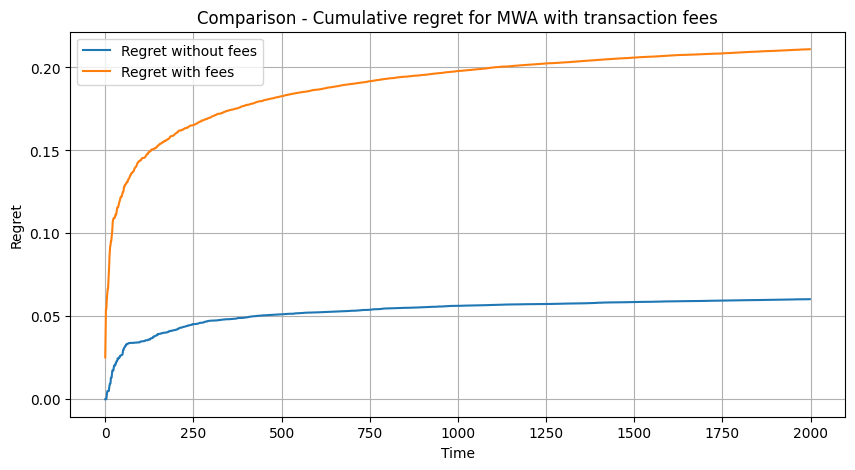

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(regret, label='Regret without fees')
plt.plot(regret_2, label='Regret with fees')
plt.xlabel('Time')
plt.ylabel('Regret')
plt.title("Comparison - Cumulative regret for MWA with transaction fees")
plt.legend()
plt.grid()
plt.show()

#### In the above plot, the comparison of the cumulative regret for experts with and without fees is demonstrated. We get from the plot that the implementation of the algorithm with transaction fees shows more regret than the one without but is still sublinear.

#### Plot 2 : Comparison of cumulative profit for both implementations.

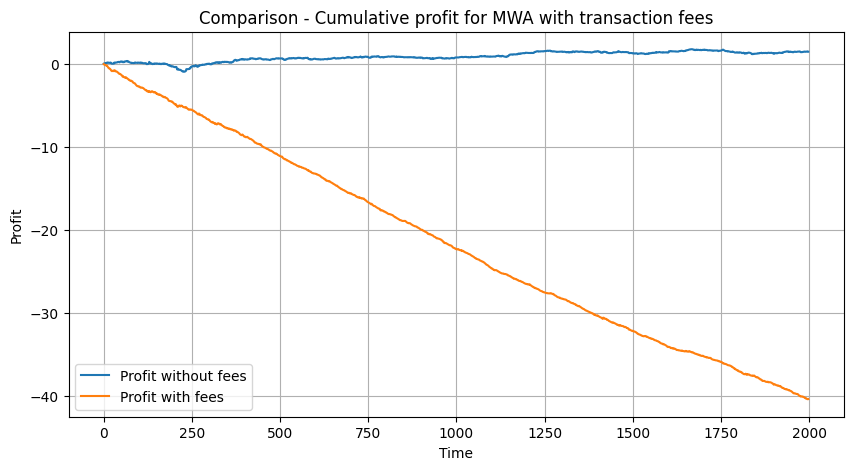

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(profit, label='Profit without fees')
plt.plot(profit_2, label='Profit with fees')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.title("Comparison - Cumulative profit for MWA with transaction fees")
plt.legend()
plt.grid()
plt.show()

#### Again we compare the two setups, observing that the one with the transaction fees has a negative profit. The algorithm still works as intented (because of the rules), it has to pick a stock every day, so when loss is unavoidable it picks the stock that loses the least.   

## Task 3: Bandits with Transaction Fees
___


#### In the third part, we were asked to implement the same problem but with a bandit setup, meaning that at the end of each day we only know the increase/decrease of our chosen stock.

In [81]:
weights = np.ones(K)                # Initialize all weights to start from 1
percentages_sums = np.zeros(K)      # Array that holds the sum of the percentages for each stock
regret_3 = np.zeros(T)              # Array that holds the regret for each t
profit_3 = np.zeros(T)              # Array that holds the amount made during the horizon

for t in range(T):
    # print(f"Weights for time {t} : {list(weights)}")

    # get current stock with probabilities based on weights
    total_weights = sum(weights)                                                     # sum of all the current weights
    choose_probabilities = np.array([ weights[i]/total_weights for i in range(K) ])  # probability to choose each agent based on weights
    chosen_stock = np.random.choice(list(df), p=choose_probabilities)                # get current stock
    #print(f"Chosen stock : {chosen_stock}")

    # percentage for current stock on time t
    current_stock_percentage = df[chosen_stock][t]-transactions_fees[chosen_stock]             # percentage for current stock minus the transaction fee

    # profit update
    profit_3[t] = current_stock_percentage if t == 0 else profit_3[t-1]+current_stock_percentage
    # print(f"Profit: {all_stock_percentages[chosen_stock]}")

    # calculate losses
    # if the percentage: positive -> loss = 0 | negative: loss = -percentage
    loss = 0 if current_stock_percentage > 0 else -current_stock_percentage
    loss_after = loss/choose_probabilities[chosen_stock]

    # calculate new weight for the chosen stock, leave all the others the same
    # w(t+1) = (1-n)^loss * w(t)
    weights[chosen_stock] = np.power((1-n),loss_after) * weights[chosen_stock]

    # calculate regret
    best_percentage_index = np.where(df.iloc[t]==np.max(df.iloc[t]))[0][0]                         # get the index of the best bandit
    best_percentage = df.iloc[t][best_percentage_index]-transactions_fees[best_percentage_index]   # get the value of the percentage of the best bandit minus the transaction fee

    current_regret = (best_percentage - current_stock_percentage)/(t+1)
    regret_3[t] = current_regret if t == 0 else regret_3[t-1]+current_regret

    # print(f"Regret 2 at time {t} : {current_regret}")
    # print(f"Total Regret at time {t} : {regret_3[t]}")
    # print()

- loss_after : $\hat{l}_i^t = \frac{loss^t_i}{probability_i}$

#### Plot 1 : Comparison of cumulative regret for experts and bandits with transaction fees.

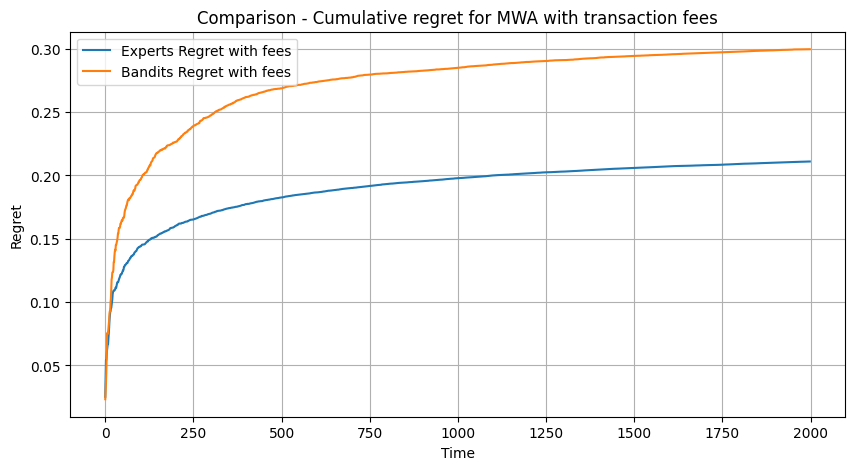

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(regret_2, label='Experts Regret with fees')
plt.plot(regret_3, label='Bandits Regret with fees')
plt.xlabel('Time')
plt.ylabel('Regret')
plt.title("Comparison - Cumulative regret for MWA with transaction fees")
plt.legend()
plt.grid()
plt.show()

#### The comparison of the cumulative regret for the implementation of the algorithm for experts and bandits with fees is displayed. We understand that the bandits setup shows higher regret than the experts one but the regret over the horizon is still sublinear.

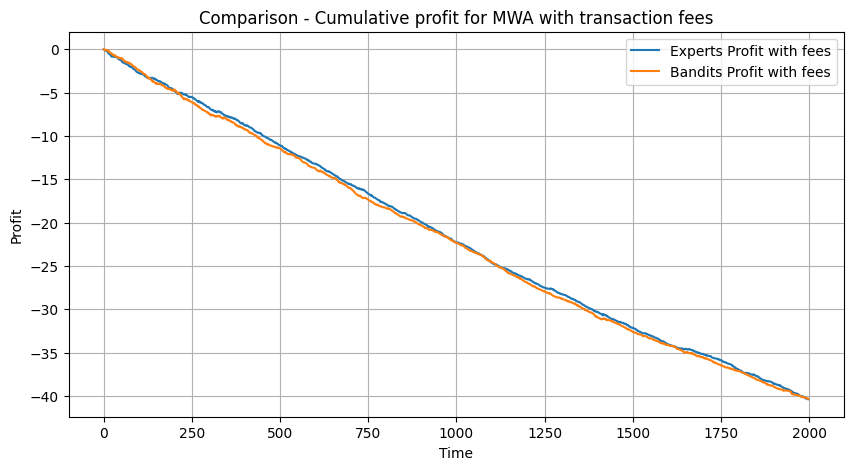

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(profit_2, label='Experts Profit with fees')
plt.plot(profit_3, label='Bandits Profit with fees')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.title("Comparison - Cumulative profit for MWA with transaction fees")
plt.legend()
plt.grid()
plt.show()

#### As before in the plot the comparison of the experts and bandits setup is shown. We observe that both the implementations show negative profit. Since the algorithm plays every day, it is supposed to lose the least and it does. Between the two setups there is no real difference in the performance for profit gain.

In [72]:
#final